In [1]:
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt
from scipy import ndimage
import ipywidgets

In [2]:
@np.vectorize
def clip(x):
    if x > 0:
        return x
    return 0

@np.vectorize
def saturate(x):
    if x > 6:
        return 255
    return 0

@np.vectorize
def desaturate(x):
    if x > 245:
        return 0
    return x

In [3]:
image1 = Image.open('frames_0001.jpg')
image2 = Image.open('frames_0002.jpg')


array1 = np.asarray(image1)
array2 = np.asanyarray(image2)

array3 = np.abs(array1 - array2)

image3 = Image.fromarray(array3[:,:,1])
image3.show()

FileNotFoundError: [Errno 2] No such file or directory: 'frames_0001.jpg'

In [4]:
folder = './B-ol10-aq15-fps1/'

images = []
for name in os.listdir(folder):
    if name.startswith('frames'):
        images.append(Image.open(folder + name))
        
arrays = np.array([np.asarray(image) for image in images])

mean_array = np.zeros_like(arrays[0],dtype=float)
for array in arrays:
    mean_array += array
mean_array /= (arrays.shape[0])

mean_array = np.array(mean_array,dtype=np.uint8)

In [90]:
for idx in range(len(arrays))[:10]:
# idx = 4

    array_sub = (arrays[idx] - mean_array + 25)*5

    Image.fromarray((array_sub[:,:,:])).show()

In [104]:
# gaussian filter
idx = 4
array_sub = (arrays[idx] - mean_array + 25)*5
array_filtered = ndimage.gaussian_filter(array_sub,3)

Image.fromarray((array_sub[:,:,:])).show()
Image.fromarray((array_filtered[:,:,:])).show()

In [5]:
def make_mask(shape,func):
    mask = np.zeros(shape,dtype=np.uint8)
    for i in range(shape[0]):
        for j in range(shape[1]):
            if func(i,j) > 0:
                mask[i,j] = 1
    return mask

In [50]:
def line1(i,j):
    return i - 0.7*j - 50

def line2(i,j):
    return -i + 0.7*j + 150

mask1 = make_mask((960,1280),line1)
mask2 = make_mask((960,1280),line2)

mask = mask1*mask2

In [59]:
np.uint8(10) - np.uint8(20)

<ipython-input-59-7fc352225e93>:1: RuntimeWarning: overflow encountered in ubyte_scalars
  np.uint8(10) - np.uint8(20)


246

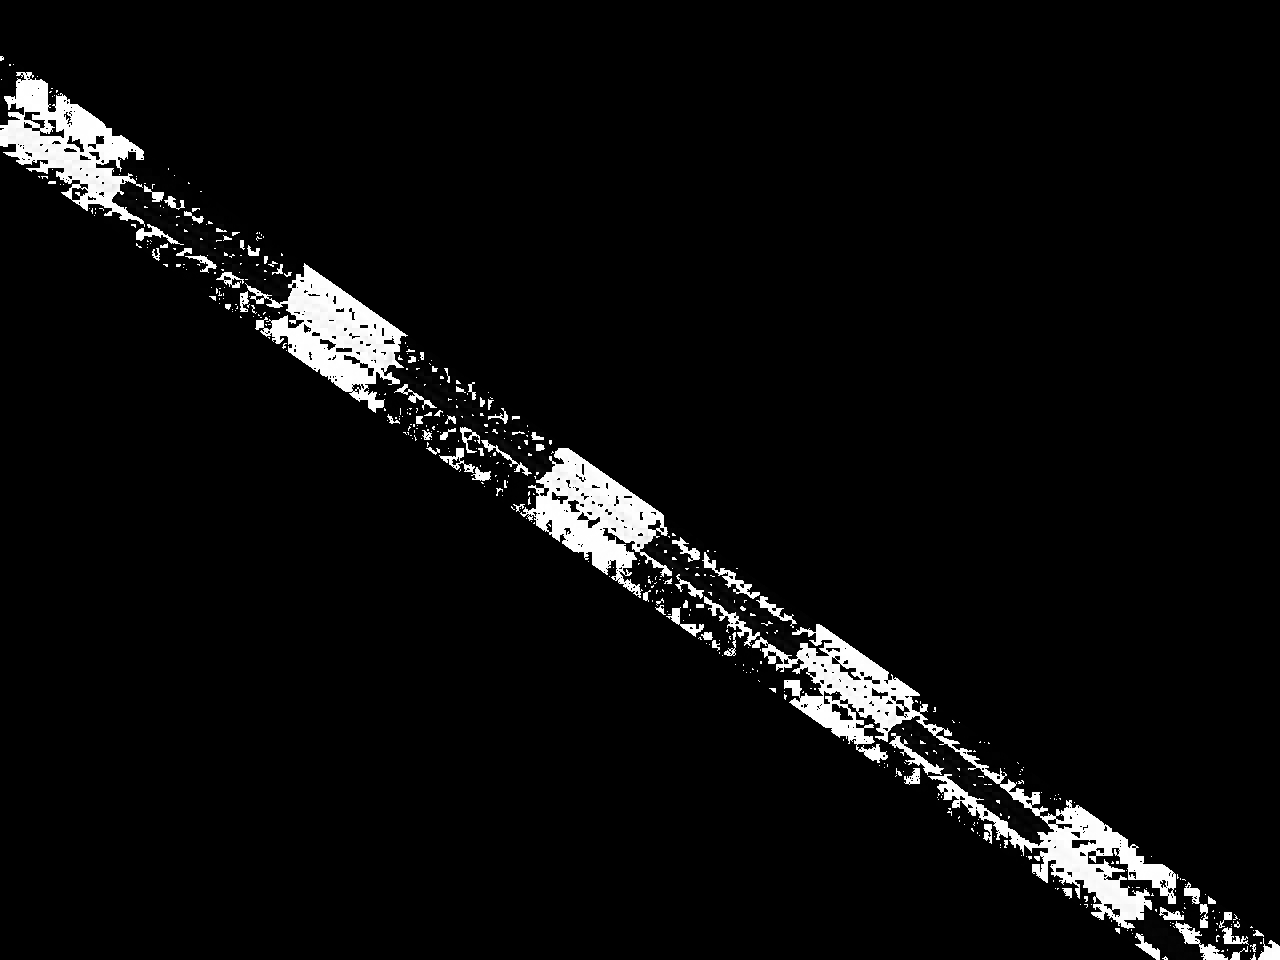

In [65]:
Image.fromarray((mean_array - arrays[17])[:,:,1]*mask)#.rotate(35)

In [6]:
# extend and rotate

def extend(array, new_shape=(960,1600)):
    new_array = np.zeros(new_shape,dtype=np.uint8)
    offset_x = (new_shape[0] - array.shape[0])//2
    offset_y = (new_shape[1] - array.shape[1])//2
    
    new_array[offset_x:(offset_x + array.shape[0]), offset_y:(offset_y + array.shape[1])] = array
    return new_array

In [105]:
Image.fromarray(arrays[0][:,:,1]).show()
Image.fromarray(extend(arrays[0][:,:,1])).rotate(35).show()

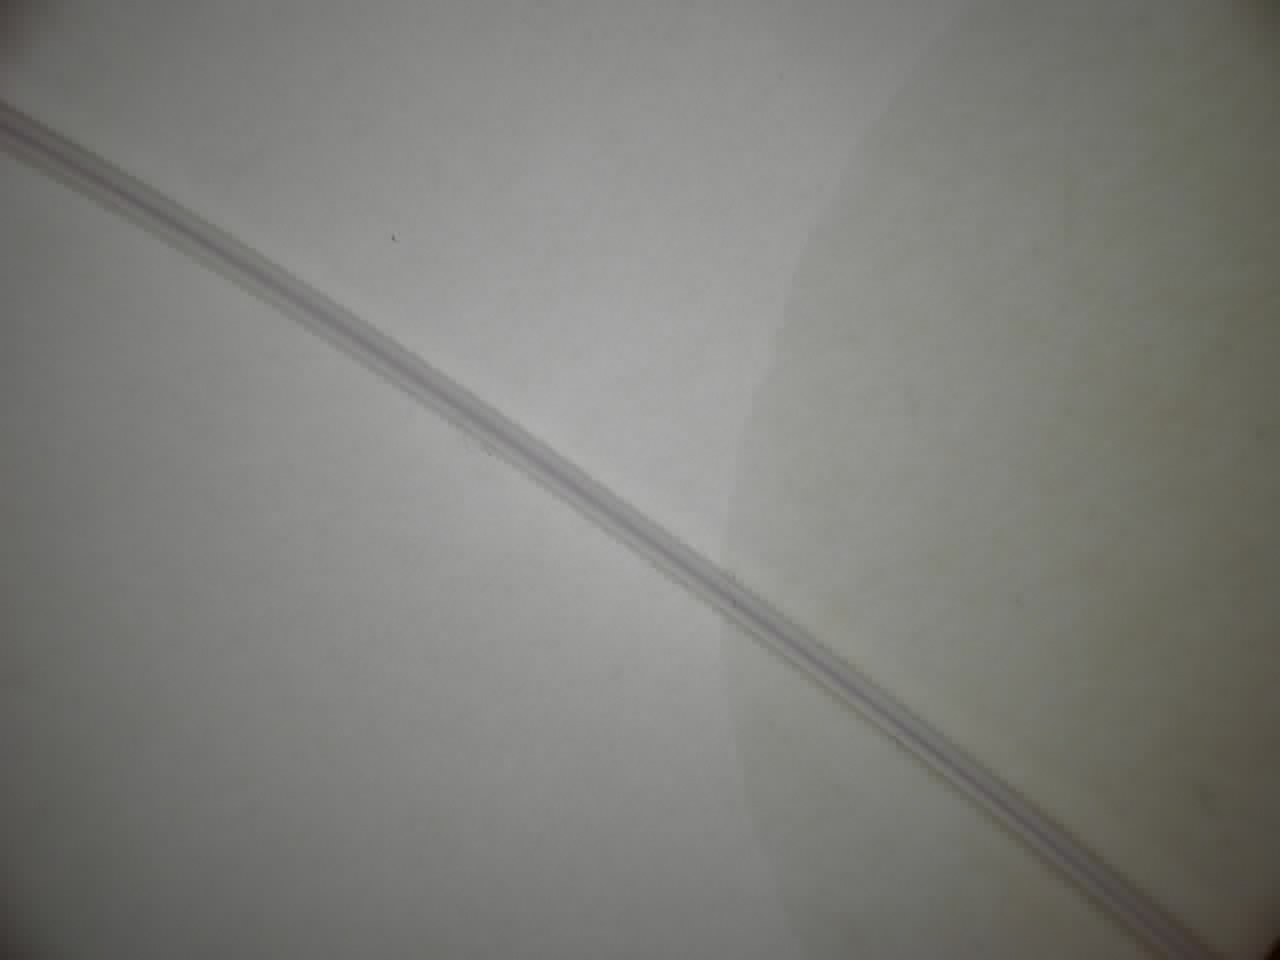

In [55]:
Image.fromarray(desaturate(np.array(mean_array,dtype=np.uint8)))

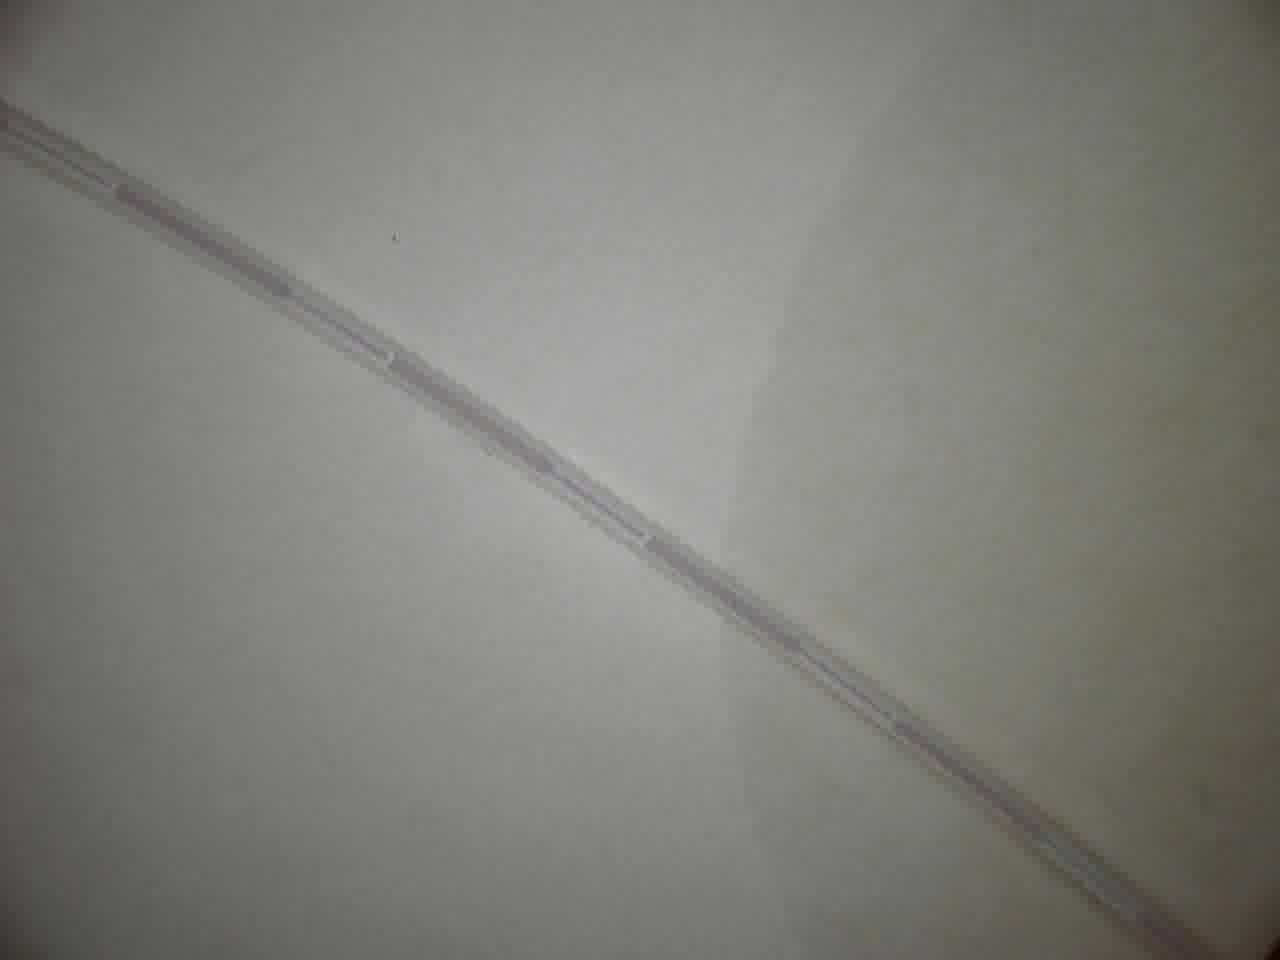

In [7]:
Image.fromarray((arrays[17]))

## Do everything

In [7]:
idx = 4

input_array = arrays[idx]

# subtract mean
array_sub = (arrays[idx] - mean_array + 25)*5

# extend and rotate
img = Image.fromarray(extend(array_sub[:,:,1])).rotate(35)

array = np.asarray(img)

<IPython.core.display.Javascript object>


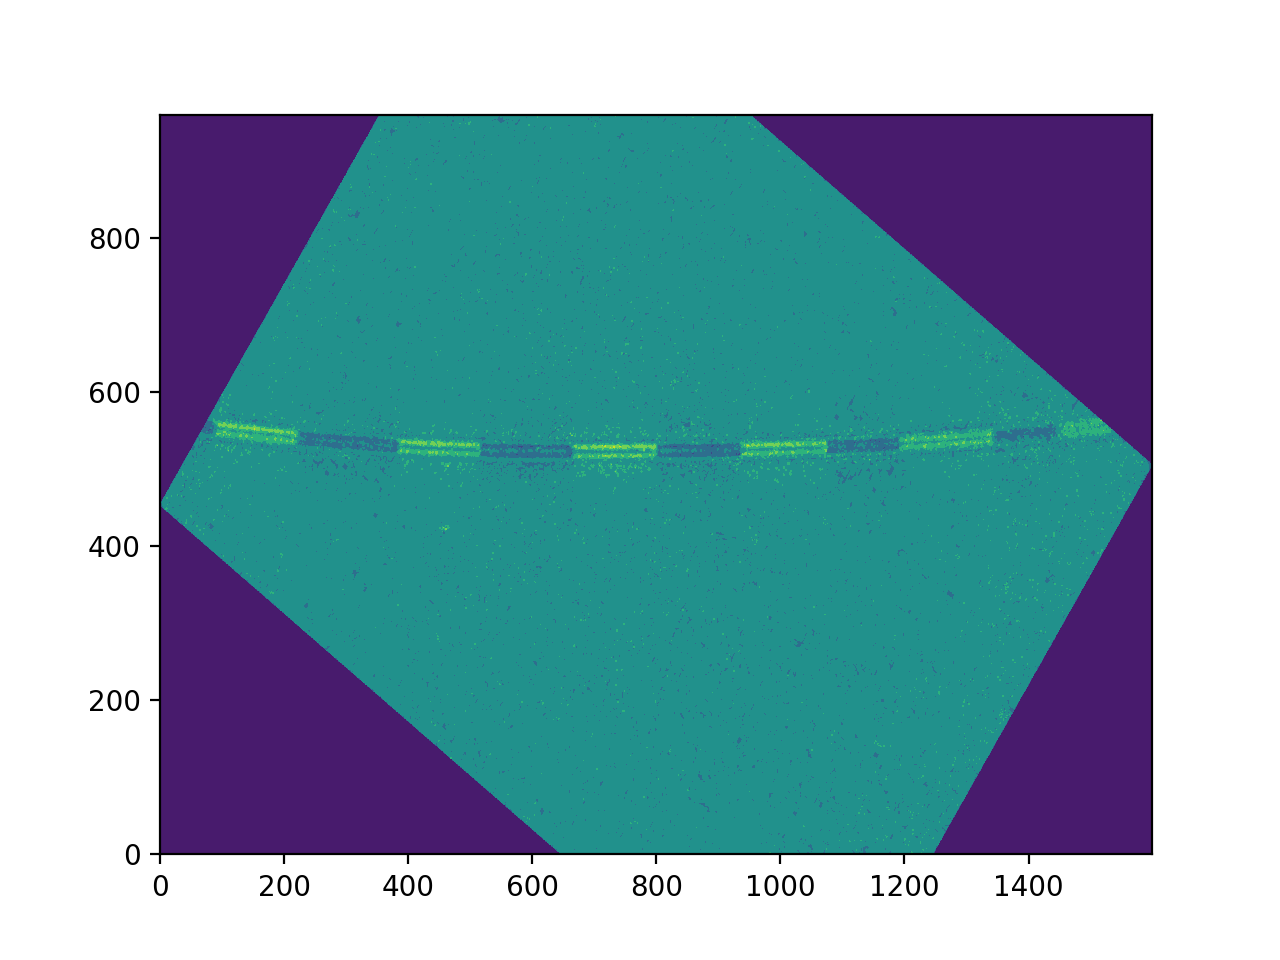

In [14]:
%matplotlib notebook
plt.figure()
plt.contourf(array)

<IPython.core.display.Javascript object>


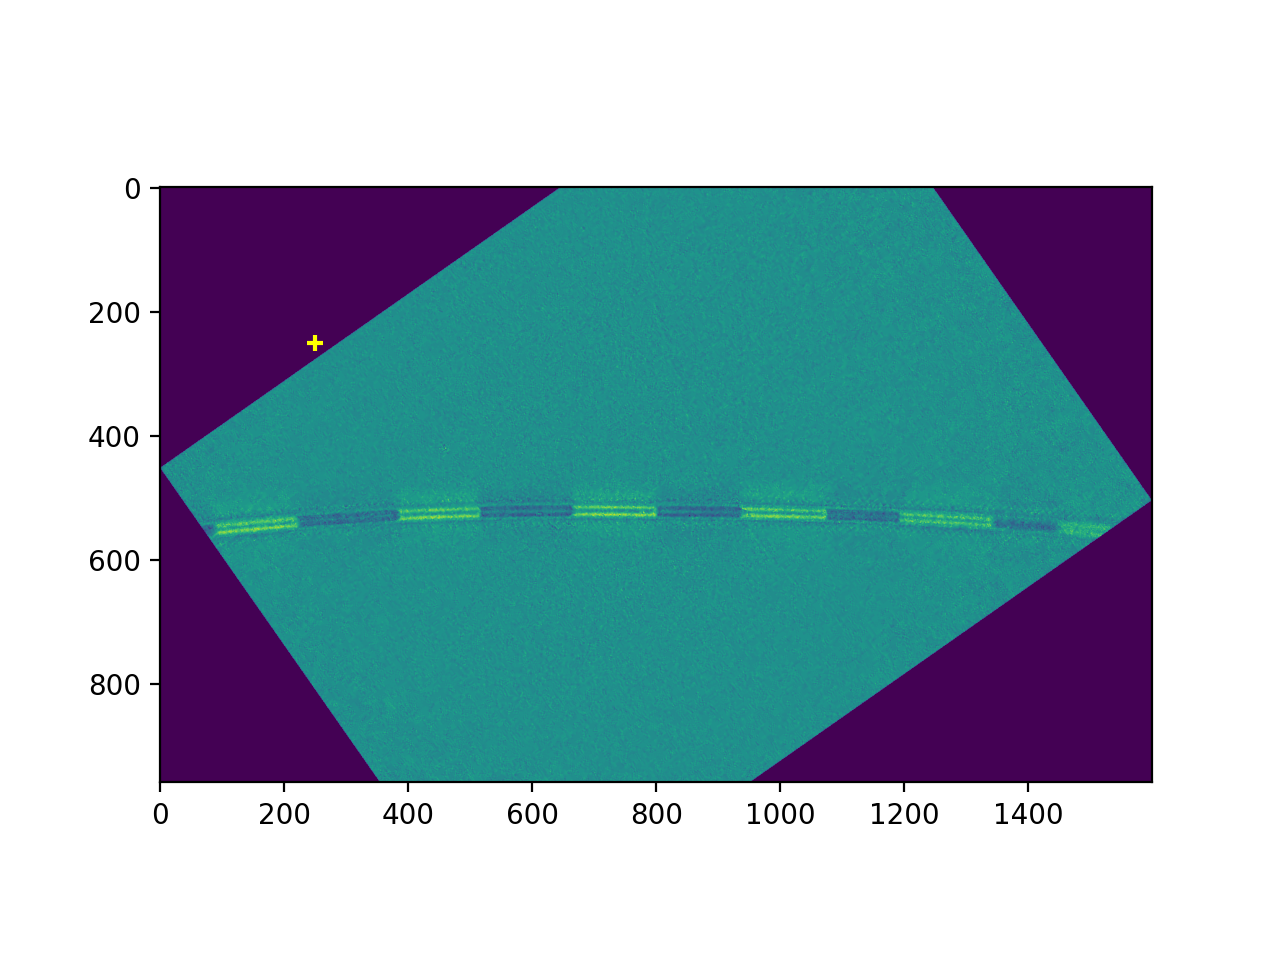

In [25]:
fig,ax = plt.subplots()
ax.imshow(img)

In [32]:
point = ax.scatter([200],[200],marker='+',color='yellow')

In [33]:
point.remove()
point = ax.scatter([250],[250],marker='+',color='yellow')

In [126]:
class channel_finder():
    
    def __init__(self):
        
        self.points = []
        self.points_on_ax = None
        self.highlight_on_ax = None
        self.thickness = 10
        self.u_border_on_ax = None
        self.l_border_on_ax = None
        self.shown_borders = False
        self.sorted_points = True
        
        self.current_index = -1
        
    def calibrate(self,img):
        fig, ax = plt.subplots()
        ax.imshow(img)
        
        def scatter_points():
            p = np.array(self.points)
            return ax.scatter(p[:,0],p[:,1],
                              marker='+',color='yellow')
        def highlight_point():
            return ax.scatter(self.points[self.current_index][0],self.points[self.current_index][1],
                              marker='+',color='red')
        
        def remove(obj):
            if obj != None:
                if obj.axes != None:
                    obj.remove()
        
        def onclick(event):
            
            # works with right click
            if event.button == 3:
                ix = int(event.xdata)
                iy = int(event.ydata)

                self.points.append([ix,iy])

                #clear previous plots
                remove(self.points_on_ax)
                remove(self.highlight_on_ax)
                self.points_on_ax = scatter_points()
                self.current_index = len(self.points) - 1
                self.highlight_on_ax = highlight_point()
                self.sorted_points = False
            
        def onpress(event):
            
            # scroll points
            if event.key == 'f':
                self.current_index = (self.current_index + 1) % len(self.points)
                remove(self.highlight_on_ax)
                self.highlight_on_ax = highlight_point()
            
            # remove a point
            if event.key == 'z':
                remove(self.points_on_ax)
                remove(self.highlight_on_ax)
                _ = self.points.pop(self.current_index)
                self.points_on_ax = scatter_points()
                
            # move a point
                # left
            if event.key == 'a':
                remove(self.highlight_on_ax)
                self.points[self.current_index][0] -= 1
                self.highlight_on_ax = highlight_point()
                
                # right
            if event.key == 'd':
                remove(self.highlight_on_ax)
                self.points[self.current_index][0] += 1
                self.highlight_on_ax = highlight_point()
            
                # up
            if event.key == 'w':
                remove(self.highlight_on_ax)
                self.points[self.current_index][1] -= 1
                self.highlight_on_ax = highlight_point()
            
                # down
            if event.key == 'x':
                remove(self.highlight_on_ax)
                self.points[self.current_index][1] += 1
                self.highlight_on_ax = highlight_point()
                
            # update the points positions
            if event.key == 'u':
                remove(self.points_on_ax)
                self.points_on_ax = scatter_points()
                
            # show boundaries
            if event.key == 'b':
                if self.shown_borders:
                    remove(self.u_border_on_ax)
                    remove(self.l_border_on_ax)
                    self.shown_borders = not self.shown_borders
                    
                else:
                    # sort the points
                    if not self.sorted_points:
                        dtype = [('x',int),('idx',int)]
                        a = np.array([(x,i) for i,x in enumerate(np.array(self.points)[:,0])], dtype=dtype)
                        a = np.sort(a,order='x')
                        self.points = [self.points[i] for i in a['idx']]
                        self.sorted_points = True
                        
                        
                    remove(self.u_border_on_ax)
                    remove(self.l_border_on_ax)
                    xs = np.array(self.points)[:,0]
                    upper_ys = np.array(self.points)[:,1] - self.thickness
                    lower_ys = upper_ys + 2*self.thickness

                    
                    self.u_border_on_ax, = ax.plot(xs,upper_ys,color='yellow')
                    self.l_border_on_ax, = ax.plot(xs,lower_ys,color='yellow')
                    
                    self.shown_borders = not self.shown_borders
                    
            # increase thickness of the borders
            if event.key == 't':
                if self.shown_borders:                    
                    self.thickness += 1
                    
                    xs = np.array(self.points)[:,0]
                    upper_ys = np.array(self.points)[:,1] - self.thickness
                    lower_ys = upper_ys + 2*self.thickness

                    remove(self.l_border_on_ax)
                    remove(self.u_border_on_ax)
                    self.u_border_on_ax, = ax.plot(xs,upper_ys,color='yellow')
                    self.l_border_on_ax, = ax.plot(xs,lower_ys,color='yellow')
                    
            # decrease thickness of the borders
            if event.key == 'y':
                if self.shown_borders:                    
                    self.thickness -= 1
                    
                    xs = np.array(self.points)[:,0]
                    upper_ys = np.array(self.points)[:,1] - self.thickness
                    lower_ys = upper_ys + 2*self.thickness

                    remove(self.l_border_on_ax)
                    remove(self.u_border_on_ax)
                    self.u_border_on_ax, = ax.plot(xs,upper_ys,color='yellow')
                    self.l_border_on_ax, = ax.plot(xs,lower_ys,color='yellow')
                    
                
                
                
            
        cid = fig.canvas.mpl_connect('button_press_event', onclick)
        cid2 = fig.canvas.mpl_connect('key_press_event', onpress)

<IPython.core.display.Javascript object>


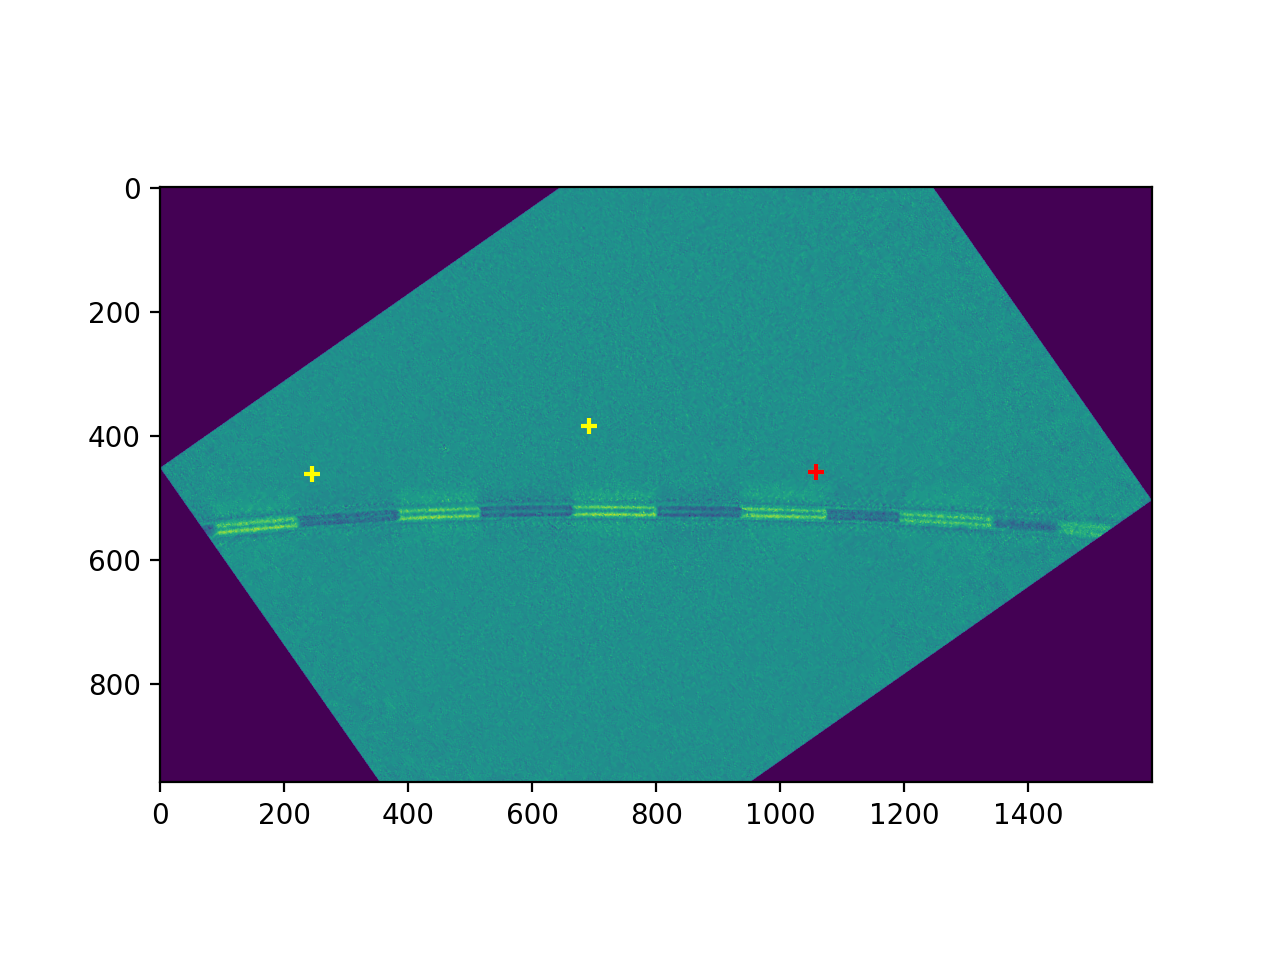

In [127]:
c = channel_finder()
c.calibrate(img)

In [121]:
del c.u_border_on_ax

In [93]:
a = True
a = not a
a

False

In [76]:
points = [[1,100],[200,201],[50,400]]

dtype = [('x',int),('idx',int)]
a = np.array([(x,i) for i,x in enumerate(np.array(points)[:,0])],dtype=dtype)
a = np.sort(a,order='x')
points = [points[i] for i in a['idx']]

print(points)

[[1, 100], [50, 400], [200, 201]]


In [69]:
a = [[2,4],[0,5],[1,17]]
a_a = np.array(a,dtype=[('x',int),('y',int)])
a_a

array([[( 2,  2), ( 4,  4)],
       [( 0,  0), ( 5,  5)],
       [( 1,  1), (17, 17)]], dtype=[('x', '<i8'), ('y', '<i8')])

In [41]:
c.points

[[136, 488], [152, 488], [226, 491], [552, 475], [836, 478]]